In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from collections import Counter 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# ELG7186 - fall 2022 - Assignment 1
## Due: <strong>Wednesday Oct. 12<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [ ]:
def get_accuracies(y_actual, y_predict):
  from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
  # print('\nClassification Report:\n')
  # print(classification_report(y_actual, y_predict))
  # print('\nConfusion Matrix:\n')
  cm = confusion_matrix(y_actual, y_predict)
  #print(cm)
  print('\nAccuracy Score:\n')
  print(accuracy_score(y_actual, y_predict))
  print('\Confusion Matrix Display:\n')
  print(ConfusionMatrixDisplay(cm).plot())

In [ ]:
# Prepare your dataset here and display samples here.
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
l=[]
dict1 = {0:[],1:[], 2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}
for i in range (110):
  dict1[y_train[i][0]].append(i)



In [ ]:
for i in range(10):
  dict1[i]=dict1[i][0:5]

In [ ]:
dict1

{0: [29, 30, 35, 49, 77],
 1: [4, 5, 32, 44, 45],
 2: [6, 13, 18, 24, 41],
 3: [9, 17, 21, 26, 33],
 4: [3, 10, 20, 28, 34],
 5: [27, 40, 51, 56, 70],
 6: [0, 19, 22, 23, 25],
 7: [7, 11, 12, 37, 43],
 8: [8, 62, 69, 92, 100],
 9: [1, 2, 14, 15, 16]}

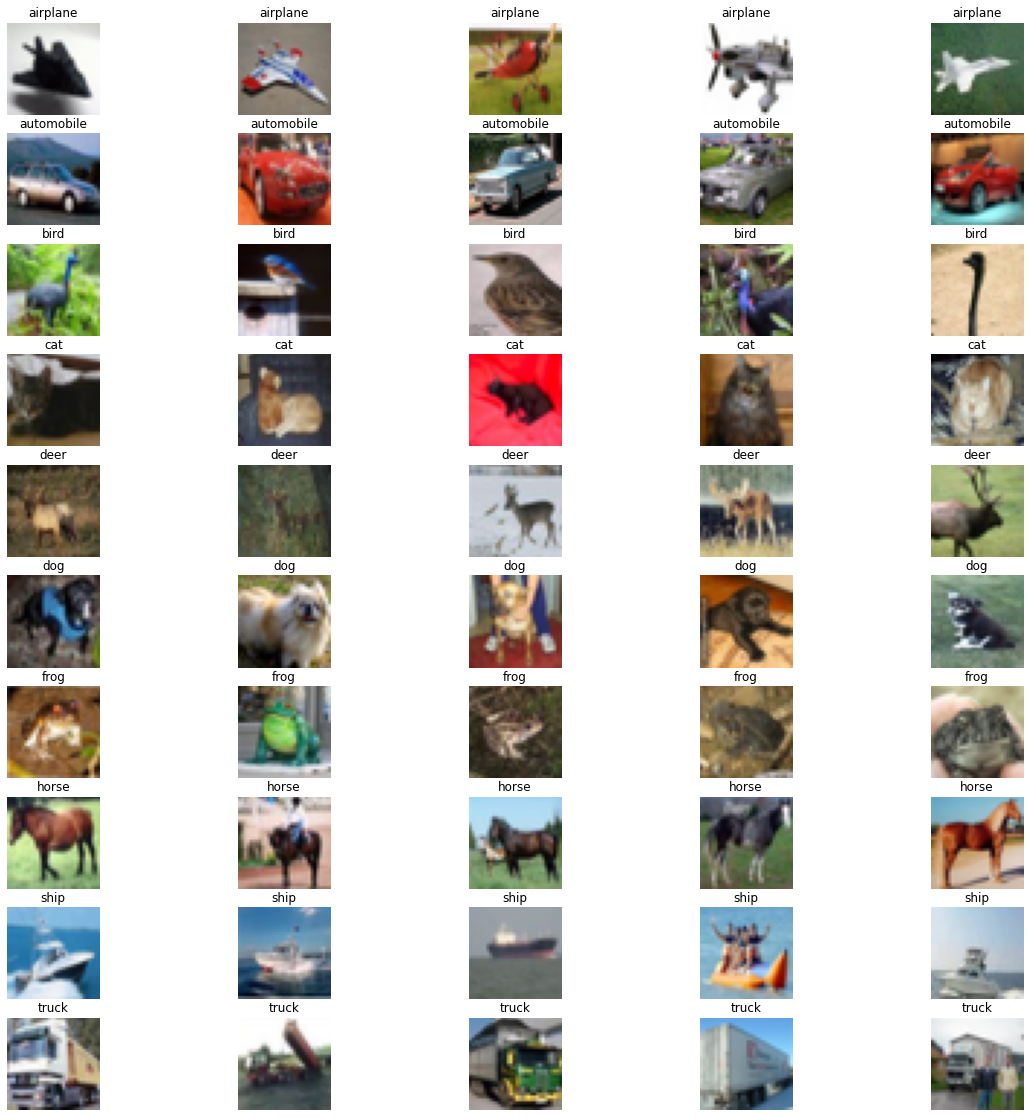

In [ ]:
fig, axes = plt.subplots(10, 5,figsize=(20,20))
for key in dict1:
  
  for j in range(5):
    ax = axes[key, j]
    ax.set_title(class_names[y_train[dict1[key][j]][0]])
    ax.axis('off')
    ax.imshow(x_train[dict1[key][j]])
    
plt.show()

## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




In [ ]:
#take a small sample
X_train=x_train[:10000,:]
Y_train=y_train[:10000,:]
X_test=x_test[:3000,:]
Y_test=y_test[:3000,:]

In [ ]:
X_train=X_train.reshape(10000,-1)/255
Y_train=Y_train.reshape(-1,)
X_test=X_test.reshape(3000,-1)/255
Y_test=Y_test.reshape(-1,)
labels=list(set(Y_train))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(labels)

(10000, 3072)
(10000,)
(3000, 3072)
(3000,)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# Write your KNN class here
#Returns the most common element in a list
def common_element(lst):
    return max(set(lst), key=lst.count)

In [ ]:
#Euclidean distance between a point  & data
def euclidean_distance(point, data):
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [ ]:
class KNeighborsClassifier():
    def __init__(self, k=5, dist_metric=euclidean_distance):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(common_element, neighbors))
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

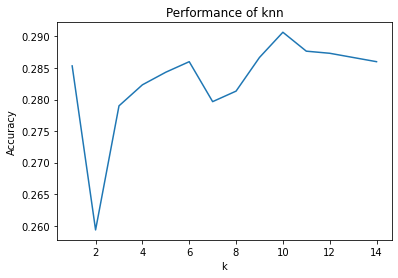

In [ ]:
accuracies = []
ks = range(1, 15)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, Y_train)
    accuracy = knn.evaluate(X_test, Y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [ ]:
KNN_model = KNeighborsClassifier(k=10)
KNNmdl = KNN_model.fit(X_train, Y_train)
y_pred_KNN = KNN_model.predict(X_test)



Accuracy Score:

0.2906666666666667
\Confusion Matrix Display:



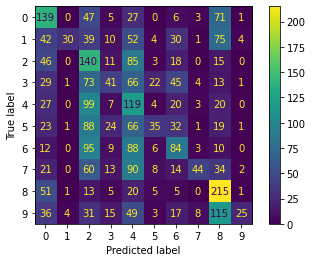

In [ ]:
get_accuracies(Y_test, y_pred_KNN)

In [ ]:
KNN_model1 = KNeighborsClassifier(k=10)
KNN_mod1 = KNN_model1.fit(X_train, Y_train)
y_pred_KNN1 = KNN_model1.predict(X_test)

y_pred_KNN1

[4,
 8,
 8,
 8,
 4,
 6,
 4,
 2,
 2,
 8,
 0,
 8,
 5,
 6,
 8,
 8,
 5,
 4,
 8,
 6,
 2,
 0,
 0,
 6,
 2,
 4,
 6,
 7,
 4,
 2,
 6,
 2,
 4,
 5,
 8,
 4,
 2,
 8,
 8,
 2,
 8,
 6,
 8,
 4,
 0,
 0,
 5,
 0,
 4,
 2,
 8,
 8,
 6,
 4,
 8,
 8,
 4,
 6,
 0,
 4,
 4,
 6,
 6,
 9,
 2,
 4,
 8,
 2,
 3,
 9,
 0,
 4,
 8,
 8,
 0,
 2,
 6,
 3,
 6,
 8,
 8,
 6,
 2,
 0,
 2,
 8,
 2,
 8,
 8,
 8,
 0,
 2,
 8,
 8,
 4,
 0,
 4,
 0,
 0,
 4,
 4,
 4,
 6,
 3,
 4,
 8,
 6,
 6,
 5,
 5,
 4,
 0,
 2,
 2,
 4,
 4,
 0,
 8,
 4,
 4,
 8,
 4,
 2,
 2,
 8,
 4,
 8,
 3,
 4,
 2,
 2,
 1,
 8,
 6,
 3,
 2,
 9,
 0,
 2,
 8,
 2,
 8,
 6,
 2,
 8,
 8,
 6,
 3,
 3,
 3,
 8,
 3,
 3,
 8,
 4,
 4,
 3,
 8,
 6,
 2,
 0,
 4,
 6,
 4,
 0,
 2,
 8,
 2,
 6,
 0,
 8,
 7,
 8,
 8,
 4,
 9,
 0,
 2,
 2,
 8,
 8,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 3,
 0,
 2,
 4,
 2,
 2,
 4,
 4,
 8,
 0,
 3,
 2,
 2,
 0,
 8,
 2,
 8,
 2,
 0,
 2,
 2,
 8,
 2,
 8,
 2,
 8,
 8,
 2,
 8,
 0,
 0,
 2,
 4,
 6,
 8,
 4,
 3,
 2,
 7,
 2,
 0,
 4,
 4,
 9,
 2,
 4,
 8,
 0,
 6,
 9,
 0,
 6,
 0,
 0,
 8,
 0,
 0,
 4,
 6,
 0,
 4,
 3,



Accuracy Score:

0.2906666666666667
\Confusion Matrix Display:



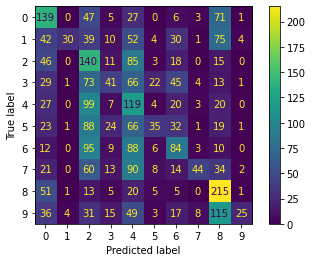

In [ ]:
get_accuracies(Y_test, y_pred_KNN1)

#KNN Classifier
###In this section, I used a euclidean matrix to measure the distance between each test data point and its neighbours. I experimented with several values of K and calculated accuracy, finding that K = 10 provided the maximum accuracy which is 29%. The confusion matrix can then be calculated. For instance, the model forecasts class  as "class dog" 35 times, which occurred as a result of image noise. In order to remove noise, we should use some preprocessing approaches, It is not as good as state-of-the-art classifiers today (a Convolutional Neural Network solution in Kaggle was able to reach a whopping 95%). But this is a good start to learn the image classification pipeline.

## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

In [ ]:
# Write your logistic regression code here.
y1 = np.zeros([len(Y_train), 10])
y1 = pd.DataFrame(y1)

In [ ]:
for i in range(0, 10):
    for j in range(0, len(y1)):
        if Y_train[j] == np.unique(Y_train)[i]:
            y1.iloc[j, i] = 1
        else: 
            y1.iloc[j, i] = 0
y1.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

def LROVR(X_train,Y_train,X_test):
  clf=LogisticRegression(random_state=0)
  clf.fit(X_train,Y_train)
  return clf.predict_proba(X_test)[:,1]

In [ ]:
pred=[]
for i in range(10):
  yy_col=y1.iloc[:,i]
  prop=LROVR(X_train,yy_col,X_test)
  pred.append(prop)

class_labels=np.argmax(pred, axis=0)
print(class_labels)


C:\Users\lap2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[1 9 8 ... 5 2 2]


C:\Users\lap2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Accuracy Score:

0.3406666666666667
\Confusion Matrix Display:



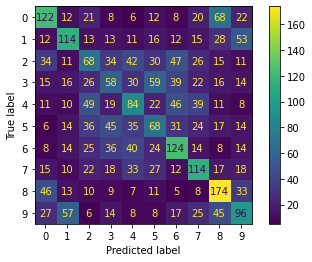

In [ ]:
get_accuracies(Y_test, class_labels)

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

In [ ]:
#classifier function
def SVC_clf(clf,X_train, Y_train,X_test):
  clf.fit(X_train, Y_train)
  presvm=clf.predict(X_test)
  return accuracy_score(presvm,Y_test)

In [ ]:
def plot_acc(c_values, accuracy):
  plt.plot(c_values, accuracy)
  plt.xlabel('tunning of the C parameter')
  plt.ylabel('Accuracy')
  plt.show()


In [ ]:
# Run your SVM experiments here.
from sklearn.svm import LinearSVC
LSVC=SVC_clf(LinearSVC(random_state=0,multi_class='ovr', tol=1e-5),X_train, Y_train,X_test)

LSVC

C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.252

In [ ]:
c_values=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
accuracy=[]
for i in c_values:
  LSVC_clf= SVC_clf(LinearSVC(random_state=0,multi_class='ovr',C=i, tol=1e-5),X_train, Y_train,X_test)
  accuracy.append(LSVC_clf)


C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


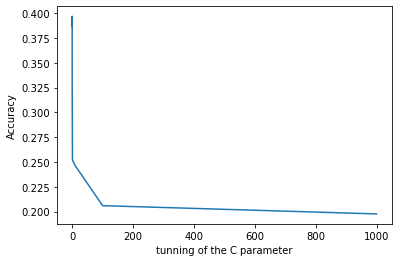

In [ ]:
plot_acc(c_values, accuracy)

In [ ]:
#add regularization term l1
accuracyl1=[]
for i in c_values:
  l1_clf= SVC_clf( LinearSVC(random_state=0,multi_class='ovr',C=i,penalty='l1', tol=1e-5,loss='squared_hinge',dual=False),X_train, Y_train,X_test)
  accuracyl1.append(l1_clf)

accuracyl1

C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lap2\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

[0.106,
 0.16733333333333333,
 0.348,
 0.38766666666666666,
 0.314,
 0.291,
 0.29233333333333333,
 0.2896666666666667]

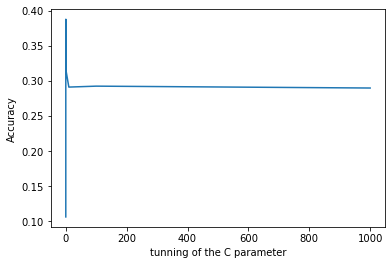

In [ ]:
plot_acc(c_values, accuracyl1)

In [ ]:
#final experiment 
from sklearn.svm import SVC
cost = [0.01, 0.1, 1, 10, 100]
gamma = [0.01, 0.1, 1, 10, 100]
accuracyCG=[]
accuracy_for_cost=[]
i_value=cost[0]
j_value=gamma[0]
acc=0
for i in cost:
  for j in gamma:
    clf= SVC_clf(SVC(random_state=0,C=i,gamma=j),X_train, Y_train,X_test)
    accuracyCG.append(clf)
    if acc<clf:
      acc=clf
      i_value=i
      j_value=j
  accuracy_for_cost.append(max(accuracyCG))
  accuracyCG = [] 




In [ ]:
accuracy_for_cost

[0.175,
 0.36566666666666664,
 0.4786666666666667,
 0.4766666666666667,
 0.4766666666666667]

In [ ]:
acc

0.4786666666666667

In [ ]:
print(i_value,j_value)


1 0.01


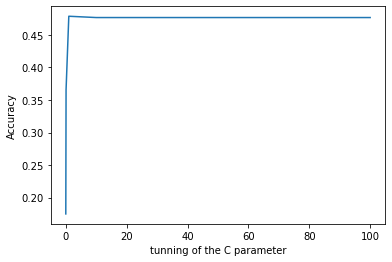

In [ ]:
plot_acc(cost, accuracy_for_cost)

In [ ]:
clff= SVC(random_state=0,C=i_value,gamma=j_value)
clff.fit(X_train, Y_train)
pred_svm1=clff.predict(X_test)


Accuracy Score:

0.4786666666666667
\Confusion Matrix Display:



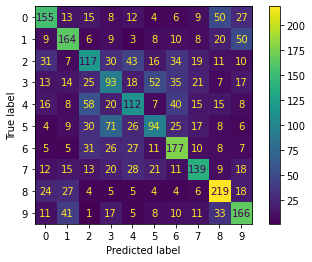

In [ ]:
get_accuracies(Y_test, pred_svm1)

## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

In this assignment we used Cifar10 dataset that classify between 10 classes, a sample of 10000 image was used in training phase and a sample of 3000 image was used in testing phase.
At the first a KNN model that classify between 10 classes was built with best K value=10 and accuracy of 29.06% was the result, using KNN is not the best algorithm to use to classify between images. Then a Logistic regression model was built using a One-vs-Rest (OvR) approach to acheive multi-class classification and it shows accuracy with 34.06% still the accuracy shows low performance at the end linear SVC model is used with tuned hyperparameter cost =1 and gamma=0.01 this model shows the highest performance with accuracy 47.8% .

<!-- Write your conclusion here -->